In [1]:
#import the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
df = pd.read_csv('clustering the Market Segments.csv')
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,2008,M,NaN,20,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
15066,2008,NaN,NaN,0,2,0,0,0,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
15067,2008,F,16.819,29,0,0,0,1,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
15068,2008,F,17.243,26,1,0,0,3,0,1,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [4]:
df.isnull().sum()

gradyear           0
gender          1428
age             2400
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        1
die                1
death              1
drunk              1
drugs              1
dtype: int64

In [5]:
df['gender'].value_counts()

F    10749
M     2893
Name: gender, dtype: int64

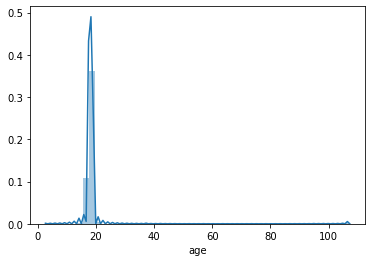

In [6]:
sns.distplot(df['age'])

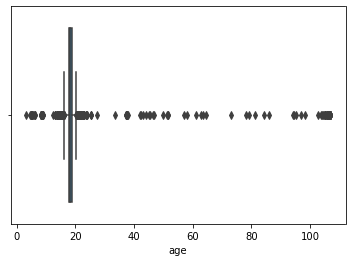

In [7]:
sns.boxplot(df['age'])

In [8]:
#remove outliers

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1 

filter = (df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

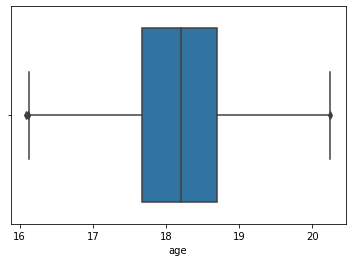

In [9]:
sns.boxplot(df['age'])

In [10]:
#now lets fill the age missing values with mean values

df['age']= df['age'].astype(int)
print(df.age.dtypes)

df['age'] = df['age'].fillna(df['age'].mean())

int64


<ipython-input-10-a8d3a0c0de26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']= df['age'].astype(int)
<ipython-input-10-a8d3a0c0de26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].mean())


In [11]:
cat_variables = df['gender']
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df = df.drop(['gender'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=50)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [13]:
df['shopping'].value_counts()

0.0    9328
1.0    2317
2.0     541
3.0     146
4.0      57
5.0      17
6.0       5
8.0       4
7.0       2
Name: shopping, dtype: int64

In [14]:
duplicate_records = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicate_records))
print(df.shape)
print(df.head(2))

Duplicate Rows except first occurrence based on all columns are :
831
(12417, 40)
   gradyear   age  friends  basketball  football  soccer  softball  \
0    2006.0  18.0      7.0         0.0       0.0     0.0       0.0   
1    2006.0  18.0      0.0         0.0       1.0     0.0       0.0   

   volleyball  swimming  cheerleading  ...  mall  shopping  clothes  \
0         0.0       0.0           0.0  ...   0.0       0.0      0.0   
1         0.0       0.0           0.0  ...   1.0       0.0      0.0   

   hollister  abercrombie  die  death  drunk  drugs    M  
0        0.0          0.0  0.0    0.0    0.0    0.0  1.0  
1        0.0          0.0  0.0    0.0    0.0    0.0  0.0  

[2 rows x 40 columns]


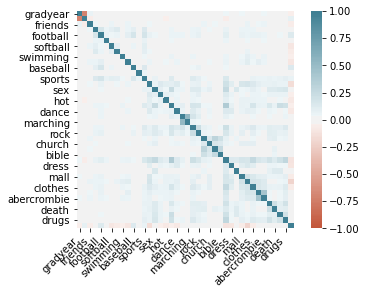

In [15]:
# Let's see next observation after EDA and feature engineering.
corr = df.corr()
ax = sns.heatmap( corr,vmin=-1, vmax=1, center=0,  cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [16]:
#Sports
dict_sports = {"basketball":"Sports","football":"Sports","soccer":"Sports","softball":"Sports",
 "volleyball":"Sports","swimming":"Sports","cheerleading":"Sports","baseball":"Sports","tennis":"Sports","sports":"Sports"}
df['Sports'] = df.groupby(dict_sports, axis = 1).sum() 

#Religion
dict_religion = {"god":"Religion","church":"Religion","jesus":"Religion","bible":"Religion","hollister":"Religion"}
df['Religion'] = df.groupby(dict_religion, axis = 1).sum() 

#Music
dict_music = {"dance":"Music","band":"Music","music":"Music","rock":"Music"}
df['Music'] = df.groupby(dict_music, axis = 1).sum() 

#Clothing
dict_clothing = {"mall":"clothing","shopping":"clothing","clothes":"clothing",
                       "abercrombie":"clothing"}
df['clothing'] = df.groupby(dict_clothing, axis = 1).sum()

#depressed
dict_depressed = {"die":"Others","death":"Others","drunk":"Others","drugs":"Others"}
df['depressed'] = df.groupby(dict_depressed, axis = 1).sum()

#Others
dict_others = {"cute":"Others","sexy":"Others","hot":"Others","kissed":"Others","marching":"Others","hair":"Others",
                       "dress":"Others","blonde":"Others",}
df['Others'] = df.groupby(dict_others, axis = 1).sum()

In [17]:
print(df.groupby('M')['Sports'].sum())
print(df.groupby('M')['Religion'].sum())
print(df.groupby('M')['Music'].sum())
print(df.groupby('M')['clothing'].sum())
print(df.groupby('M')['depressed'].sum())
print(df.groupby('M')['Others'].sum())

M
0.0    13854.0
1.0     3974.0
Name: Sports, dtype: float64
M
0.0    9370.0
1.0    2084.0
Name: Religion, dtype: float64
M
0.0    16870.0
1.0     3849.0
Name: Music, dtype: float64
M
0.0    8464.06
1.0     741.00
Name: clothing, dtype: float64
M
0.0    4592.4
1.0    1154.0
Name: depressed, dtype: float64
M
0.0    14789.0
1.0     1309.0
Name: Others, dtype: float64


In [18]:
df_final = df.copy()
df_final = df_final.drop(['basketball','football','soccer','softball',
                        'volleyball','swimming','cheerleading','baseball','tennis','sports','cute',
                        'sex','sexy','hot','kissed','dance','band','marching','music','rock','god',
                        'church','jesus','bible','hair','dress','blonde','mall','shopping','clothes',
                        'hollister','abercrombie','die','death','drunk','drugs'],axis = 1) 
df_final

,gradyear,age,friends,M,Sports,Religion,Music,clothing,depressed,Others
0,2006.0,18.0,7.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0
1,2006.0,18.0,0.0,0.0,1.0,1.0,4.0,1.00,0.0,11.0
2,2006.0,18.0,69.0,1.0,1.0,0.0,3.0,0.00,1.0,0.0
3,2006.0,18.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,1.0
4,2006.0,18.0,10.0,0.0,0.0,1.0,5.0,2.00,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...
12412,2008.0,16.0,2.0,1.0,4.0,0.0,0.0,0.00,0.0,0.0
12413,2008.0,16.0,0.0,0.0,2.0,0.0,0.0,3.00,0.0,1.0
12414,2008.0,16.0,29.0,0.0,1.0,1.0,0.0,1.00,0.0,0.0
12415,2008.0,17.0,26.0,0.0,5.0,3.0,2.0,1.00,1.0,1.0


In [19]:
def float_to_int(columns):
    for col in columns:
        df_final[col]= df[col].astype(int)

In [20]:
float_to_int(df_final.columns)

In [21]:
df_final.dtypes

gradyear     int64
age          int64
friends      int64
M            int64
Sports       int64
Religion     int64
Music        int64
clothing     int64
depressed    int64
Others       int64
dtype: object

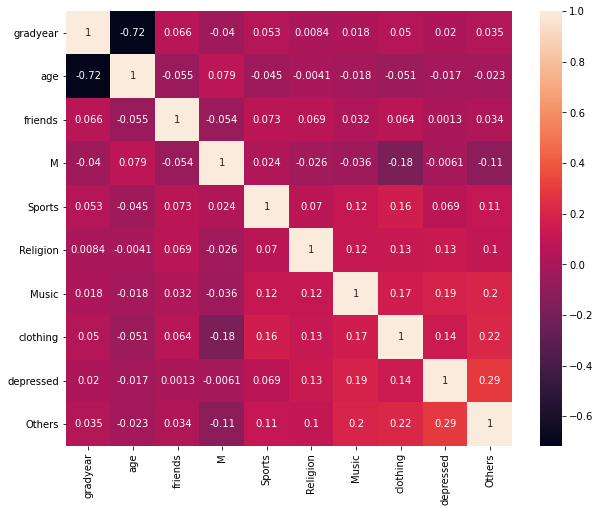

In [22]:
# Correlation Heat Map

figsize=[10,8]
plt.figure(figsize=figsize)
sns.heatmap(df_final.corr(),annot=True)
plt.show()

In [23]:
df_final=df_final.rename(columns={'M':'Male'})

/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


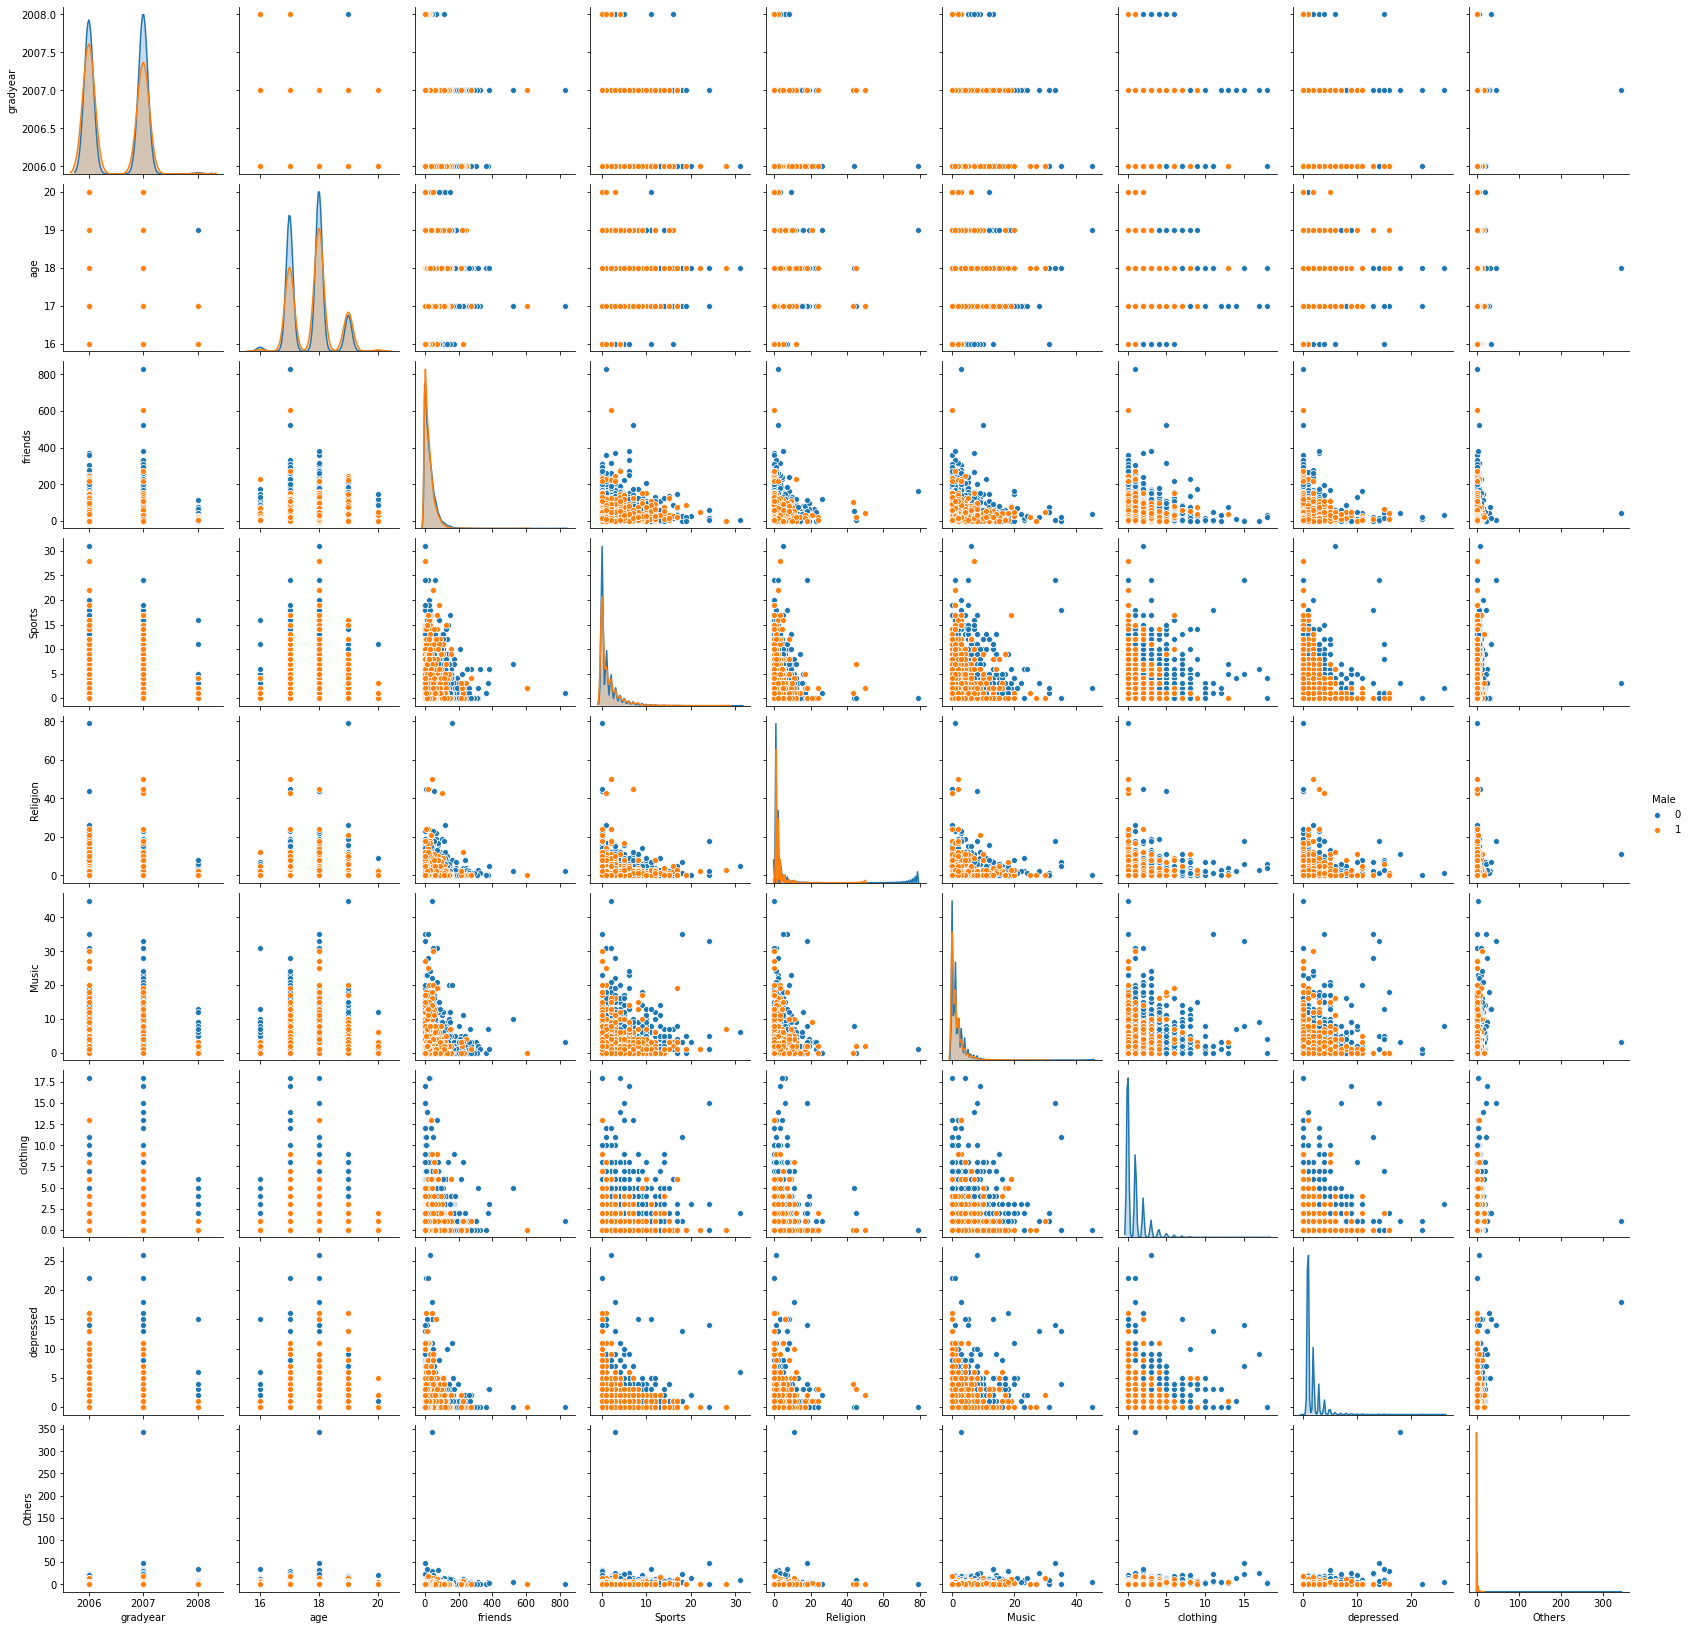

In [24]:
sns.pairplot(df_final, hue='Male')

In [25]:
knn_data = df_final.drop(['gradyear','friends','age'], axis =1)
knn_data

,Male,Sports,Religion,Music,clothing,depressed,Others
0,1,0,0,1,0,0,0
1,0,1,1,4,1,0,11
2,1,1,0,3,0,1,0
3,0,0,0,1,0,0,1
4,0,0,1,5,2,2,6
...,...,...,...,...,...,...,...
12412,1,4,0,0,0,0,0
12413,0,2,0,0,3,0,1
12414,0,1,1,0,1,0,0
12415,0,5,3,2,1,1,1


In [26]:
knn_data.describe()

,Male,Sports,Religion,Music,clothing,depressed,Others
count,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000
mean,0.207135,1.435774,0.922445,1.668600,0.741322,0.462753,1.296448
std,0.405270,2.350851,2.170531,2.448491,1.304703,1.182148,3.771649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,1.000000,31.000000,79.000000,45.000000,18.000000,26.000000,343.000000


In [27]:
from sklearn.cluster import KMeans
wcss=[]
cluster_range=range(1,11)
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(knn_data)
    wcss.append(kmeans.inertia_)

In [28]:
wcss_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":wcss})
print(wcss_df)


   no. of clusters            SSW
0                1  418693.802690
1                2  357799.322311
2                3  242408.006878
3                4  207571.621360
4                5  183710.183462
5                6  164100.083585
6                7  148838.296602
7                8  138218.222136
8                9  128082.194155
9               10  120391.944185


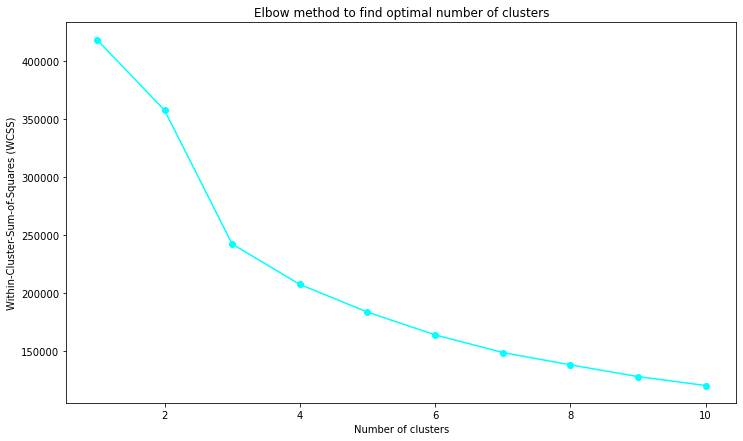

In [29]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, wcss, marker = "o",color="cyan")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow method to find optimal number of clusters")
plt.show()


In [30]:
kmeans=KMeans(n_clusters=7, init="k-means++", n_init=10, random_state = 42)
# Fit the model
k_model=kmeans.fit(knn_data)

In [31]:
## It returns the cluster vectors i.e. showing observations belonging which clusters 
clusters=k_model.labels_
clusters

array([2, 0, 1, ..., 2, 6, 0], dtype=int32)

In [32]:
knn_data['clusters'] = clusters

In [33]:
knn_data['clusters'].value_counts()

2    7698
1    1846
6    1334
0    1075
4     296
5     167
3       1
Name: clusters, dtype: int64

In [34]:
knn_data = knn_data.drop(['Male'], axis =1)

/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/niharika

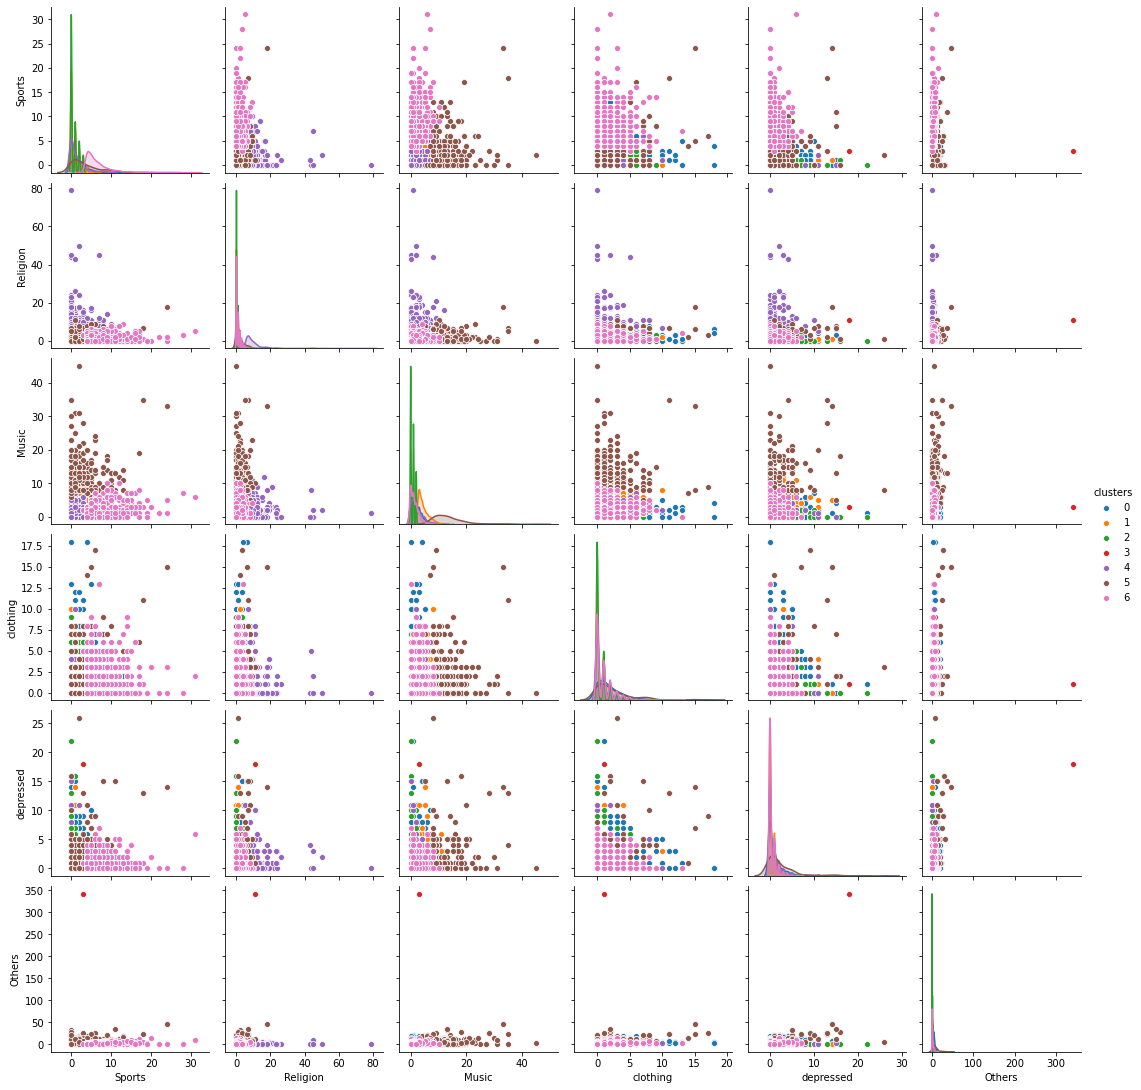

In [35]:
sns.pairplot(knn_data, hue="clusters", diag_kind="kde")
